In [62]:
!cat data/sentences.txt

In comparison to dogs, cats have not undergone major changes during the domestication process.
As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.
A common interactive use of cat for a single file is to output the content of a file to standard output.
Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.
In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.
The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.
Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).
However, if the output is piped or redirected, cat is unnecessary.
cat with one named file is safer where human error is a concern - one wrong use of the

In [14]:
import re
data = []
with open('data/sentences.txt') as f:
    for line in f.readlines():
        line = line.strip().lower()
        data.append(filter(lambda x: x, re.split('[^a-z]+', line)))

In [38]:
from operator import itemgetter
dictionary = {}
cnt = 0
for line in data:
    for word in line:
        if word not in dictionary:
            dictionary[word] = cnt
            cnt += 1
lst_dict = map(itemgetter(0), sorted(dictionary.iteritems(), key=itemgetter(1)))

In [40]:
from collections import defaultdict
import numpy as np
X = []
for line in data:
    word_count = defaultdict(int)
    for word in line:
        word_count[word] += 1
    X.append( [(word_count[w] if w in word_count else 0) for w in lst_dict] )

In [84]:
X_np = np.array(X)
from scipy.spatial.distance import cosine
cosined = sorted(enumerate([cosine(X_np[0], x) for x in X_np], start=0), key=itemgetter(1))
print cosined[0:10]
answer_1 = " ".join(map(lambda x: str(x), map(itemgetter(0), cosined[1:3])))
with open("data/assignment_1.txt", 'w') as f:
    f.write(answer_1)
answer_1    

[(0, 0.0), (6, 0.7327387580875756), (4, 0.77708871496985887), (21, 0.82503644694405864), (10, 0.83281653622739416), (12, 0.83964325485254543), (16, 0.84063618542208085), (20, 0.84275727449171223), (2, 0.86447381456421235), (13, 0.87035925528956715)]


'6 4'

In [85]:
print data[6]
print data[4]

['domestic', 'cats', 'are', 'similar', 'in', 'size', 'to', 'the', 'other', 'members', 'of', 'the', 'genus', 'felis', 'typically', 'weighing', 'between', 'and', 'kg', 'and', 'lb']
['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin']


In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [218]:
from scipy.linalg import solve

In [219]:
b = f(np.array([1.0, 15.0]))
A = np.array([[1.0, 1.0], [1.0, 15.0]])
a1 = solve(A, b)

In [220]:
b = f(np.array([1.0, 8.0, 15.0]))
A = np.array([[1.0, 1.0, 1.0], [1.0, 8.0, 64.0], [1.0, 15.0, 225.0]])
a2 = solve(A, b)
A, b

(array([[   1.,    1.,    1.],
        [   1.,    8.,   64.],
        [   1.,   15.,  225.]]),
 array([ 3.25221687,  2.31617016,  0.63522142]))

In [221]:
b = f(np.array([1.0, 4.0, 10.0, 15.0]))
A = np.array([[1.0, 1.0, 1.0, 1.0], [1.0, 4.0, 16.0, 64.0], [1.0, 10.0, 100.0, 1000.0], [1.0, 15.0, 225.0, 3375.0]])
a3 = solve(A, b)

In [241]:
def f_1(x):
    return a1[0] + a1[1] * x

def f_2(x):
    return a2[0] + a2[1] * x + a2[2] * x * x

def f_3(x):
    return a3[0] + a3[1] * x + a3[2] * x * x + a3[3] * x * x * x

In [240]:
a3[0]

4.3626415351180707

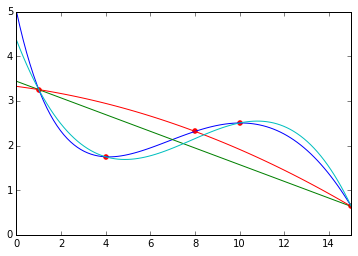

In [244]:
x = np.linspace(0.0, 15.0, 100)
plt.plot(x, f(x))
plt.plot(x, f_1(x))
plt.plot(x, f_2(x))
plt.plot(x, f_3(x))
plt.axis([0, 15, 0, 5])
sp_x = np.array([1.0, 4.0, 8.0, 10.0, 15.0])
plt.scatter(sp_x, f(sp_x), color='red')

In [227]:
answer_2 = " ".join(map(lambda x: str(round(x, 2)), a3))
with open("data/assignment_2.txt", 'w') as f:
    f.write(answer_2)
answer_2

'4.36 -1.3 0.19 -0.01'